<a href="https://colab.research.google.com/github/JonasFerReis/Knapsack_Problem/blob/main/knapsack_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório - Knapsack Problem

**Aluno:** Jonas Fernandes dos Reis

**Matrícula:** 202020470

## Visão Geral

Algoritmo desenvolvido para resolver o Knapsack Problem, utilizando o Simulated Anneling.
Inicialmente é definido um vetor com vários items, onde cada item possuí nome, peso e valor. Em seguida definimos os parâmetros do Simulated Anneling e os métodos para gerar uma solução inicial, para gerar um novo vizinho com base na solução atual, e para calcular o valor de uma solução. Por último definimos o método do Simulated Anneling.
Uma solução será um vetor com o tamanho igual a quantidade de items disponiveis, cada índice desse vetor será preenchido com 0 ou 1, onde 0 significa que o item não foi adicionado, e 1 que o item foi adicionado.

## Funcionamento dos Métodos

### generate_initial_solution:

```
def generate_initial_solution():
    initial_solution = []
    weight = 0

    for i in range(len(items)):
        rand = random.randint(0, 1)
        if rand == 0:
            initial_solution.append(0)
        else:
            if weight + items[i]["weight"] <= max_weight:
                weight += items[i]["weight"]
                initial_solution.append(1)
            else:
                initial_solution.append(0)

    return initial_solution
```
Método para criar uma solução inicial. Criamos um laço que percorre pelo vetor de items disponíveis. A cada iteração a váriavel `rand` será preenchida aleatóriamente com 0 ou 1:

- Caso seu valor seja 0, adicionamos ao `initial_solution` o valor 0, o que significa que o item daquele índice não foi adicionado.
- Caso seu valor seja 1, significa que o item pode ser adicionado a solução, mas antes verificamos se o peso acumulado somado ao peso do item não ultrapassa o limite da mochila. Se o peso estiver dentro do limite, então acrescentamos o peso do item ao peso acumulado e adicionamos o valor 1 ao `initial_solution`. Se o peso estiver ultrapassado o valor da mochila, adicionamos 0.

Por fim retornamos o initial_solution.

### evaluate:

```
def evaluate(solution):
    total_value = 0

    for i in range(len(solution)):
        if solution[i] == 1:
            total_value += items[i]["value"]

    return total_value
```
Método para cálcular o valor de uma solução. Passamos uma solução por parâmetro, então iteramos pela solução buscando índices com valor 1, quando encontrados, somamos o valor do item daquele índice ao valor total. Por fim, retornamos o valor total.

### generate_neighbour:

```
def generate_neighbour(solution):
    while 1 == 1:
      neighbour = solution.copy()
      index = random.randint(0, len(solution) - 1)
      neighbour[index] = 1 - neighbour[index]

      weight = 0
      for i in range(len(neighbour)):
          if neighbour[i] == 1:
              weight += items[i]["weight"]

      if weight <= max_weight:
          return neighbour
```
Método para gerar uma solução vizinha. Dentro de um laço infinito, criamos uma cópia da solução atual, e invertemos, aleatóriamente, o valor de um índice dessa cópia. Em seguida criamos um novo laço, onde iteramos pela cópia somando seu peso, caso ele ultrapasse o valor máximo da mochila, o laço realizará outra iteração, recalculando uma nova cópia, até que seja gerado um vizinho com peso válido, então ele é retornado e o laço é encerrado.

### simulated_annealing:

```
def simulated_annealing():
    temperature = initial_temperature
    current_solution = generate_initial_solution()
    best_solution = current_solution.copy()

    while temperature > final_temperature:
        for _ in range(iterations_per_temperature):
            neighbour_solution = generate_neighbour(current_solution)
            current_value = evaluate(current_solution)
            neighbour_value = evaluate(neighbour_solution)

            delta = neighbour_value - current_value

            if delta > 0 or random.random() < math.exp(delta / temperature):
                current_solution = neighbour_solution
                if neighbour_value > evaluate(best_solution):
                    best_solution = neighbour_solution

        plotError.append(evaluate(current_solution))
        plotTemperature.append(temperature)
        temperature *= cooling_factor

    return best_solution
```
Método do algoritmo Simulated Anneling. Começamos definindo a temperatura, gerando uma solução inicial e armazenando a solução inicial como a melhor solução. Em seguida criamos o laço principal do algoritmo, que vai iterar enquanto a temperatura atual for maior que a temperatura final. Dentro do laço principal, criamos um novo laço, que realizará um certo número de iterações para cada nivel de temperatura, determinado por `iteration_per_temperature`. Esse novo laço, tem o objetivo de ampliar a quantidade de soluções testadas com uma mesma probabilidade de aceitação, para melhorar a precisão do resultado. Dentro do laço interno geramos um vizinho e calculamos o seu valor e o valor da solução atual. Em seguida calculamos o delta, e verificamos o seu valor:
- Caso seja maior que 0, significa que a solução do vizinho é melhor, então a definimos como a solução atual,
- Caso seja menor que 0, então calculamos a chance dessa solução ainda ser aceita com: `random.random() < math.exp(delta / temperature)`.

Em ambos os casos, quando uma solução vizinha é aceita, verificamos se seu valor é melhor do que o valor da melhor solução, e se for, então substituimos o valor da melhor solução.
Saindo do laço interno, abaixamos a temperatura, até que ela chegue a temperatura final, então retornamos a melhor solução encontrada.

## Resultados

Resultados gerados com os seguintes parâmentros:

initial_temperature = 100
final_temperature = 1
cooling_factor = 0.95
iterations_per_temperature = 100
max_weight = 15

Items utilizados:
```
items = [
    {"name": "Item 1", "weight": 2, "value": 5},
    {"name": "Item 2", "weight": 3, "value": 8},
    {"name": "Item 3", "weight": 5, "value": 12},
    {"name": "Item 4", "weight": 7, "value": 15},
    {"name": "Item 5", "weight": 10, "value": 20},
    {"name": "Item 6", "weight": 4, "value": 10},
    {"name": "Item 7", "weight": 6, "value": 13},
    {"name": "Item 8", "weight": 8, "value": 17},
    {"name": "Item 9", "weight": 9, "value": 21},
    {"name": "Item 10", "weight": 11, "value": 25},
    {"name": "Item 11", "weight": 3, "value": 7},
    {"name": "Item 12", "weight": 6, "value": 14},
    {"name": "Item 13", "weight": 9, "value": 18},
    {"name": "Item 14", "weight": 12, "value": 22},
    {"name": "Item 15", "weight": 15, "value": 27},
    {"name": "Item 16", "weight": 4, "value": 9},
    {"name": "Item 17", "weight": 6, "value": 11},
    {"name": "Item 18", "weight": 8, "value": 14},
    {"name": "Item 19", "weight": 10, "value": 18},
    {"name": "Item 20", "weight": 13, "value": 23},
    {"name": "Item 21", "weight": 3, "value": 6},
    {"name": "Item 22", "weight": 5, "value": 10},
    {"name": "Item 23", "weight": 7, "value": 13},
    {"name": "Item 24", "weight": 9, "value": 16},
    {"name": "Item 25", "weight": 11, "value": 20}
]
```
- Exemplo de resultado do Erro

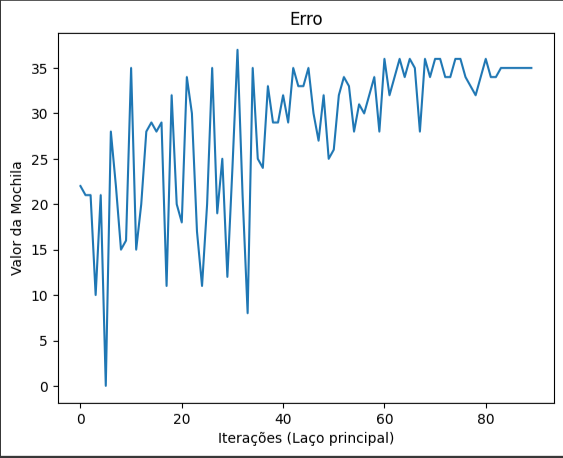

- Exemplo de resultado da Temperatura

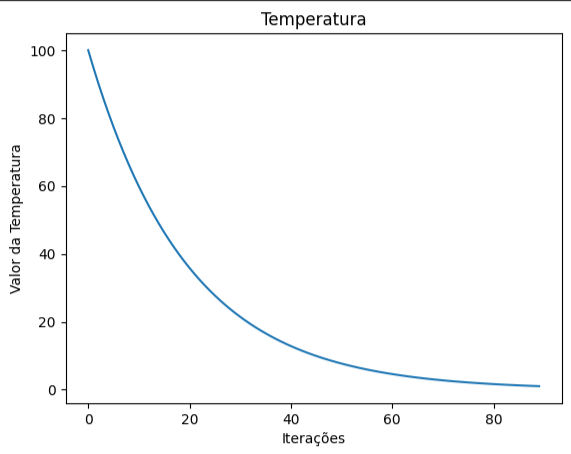

Nos testes realizados, para uma mochila de peso máximo 15, as combinações mais frequêntes foram:

- Item 2, Item 3, Item 6, Item 11;
- Item 1, Item 2, Item 6, Item 12.

Ambas resultando em uma mochila com valor 37.

Melhor solução encontrada:
Item 1
Item 2
Item 6
Item 12
Valor total: 37


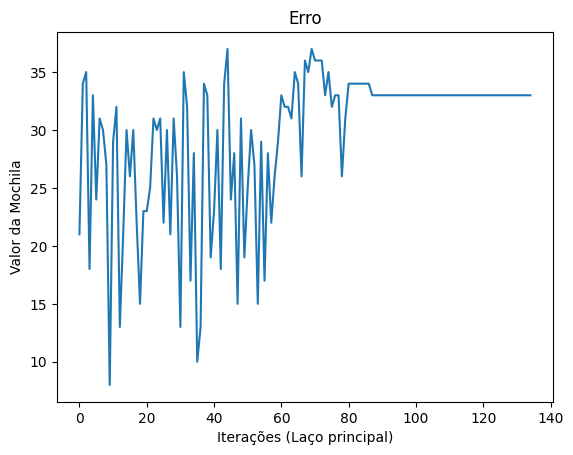

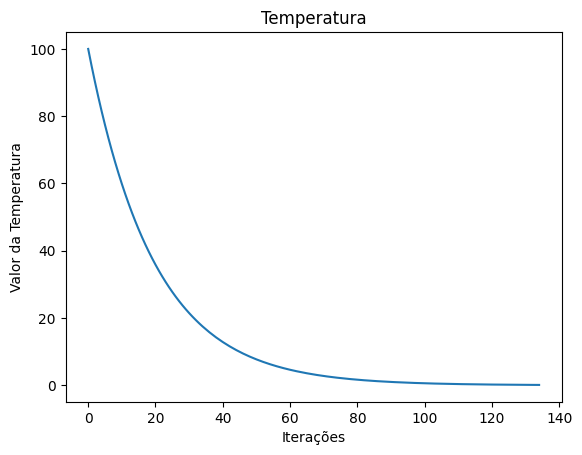

In [314]:
import random
import math
import matplotlib.pyplot as plt

# Histórico dos valores para criação dos gráficos
plotError = []
plotTemperature = []

# Definindo os itens da mochila
items = [
    {"name": "Item 1", "weight": 2, "value": 5},
    {"name": "Item 2", "weight": 3, "value": 8},
    {"name": "Item 3", "weight": 5, "value": 12},
    {"name": "Item 4", "weight": 7, "value": 15},
    {"name": "Item 5", "weight": 10, "value": 20},
    {"name": "Item 6", "weight": 4, "value": 10},
    {"name": "Item 7", "weight": 6, "value": 13},
    {"name": "Item 8", "weight": 8, "value": 17},
    {"name": "Item 9", "weight": 9, "value": 21},
    {"name": "Item 10", "weight": 11, "value": 25},
    {"name": "Item 11", "weight": 3, "value": 7},
    {"name": "Item 12", "weight": 6, "value": 14},
    {"name": "Item 13", "weight": 9, "value": 18},
    {"name": "Item 14", "weight": 12, "value": 22},
    {"name": "Item 15", "weight": 15, "value": 27},
    {"name": "Item 16", "weight": 4, "value": 9},
    {"name": "Item 17", "weight": 6, "value": 11},
    {"name": "Item 18", "weight": 8, "value": 14},
    {"name": "Item 19", "weight": 10, "value": 18},
    {"name": "Item 20", "weight": 13, "value": 23},
    {"name": "Item 21", "weight": 3, "value": 6},
    {"name": "Item 22", "weight": 5, "value": 10},
    {"name": "Item 23", "weight": 7, "value": 13},
    {"name": "Item 24", "weight": 9, "value": 16},
    {"name": "Item 25", "weight": 11, "value": 20}
]

# Parâmetros do Simulated Annealing
initial_temperature = 100
final_temperature = 0.1
cooling_factor = 0.95
iterations_per_temperature = 100
max_weight = 15

# Gera uma solução inicial aleatória
def generate_initial_solution():
    initial_solution = []
    weight = 0

    for i in range(len(items)):
        rand = random.randint(0, 1)
        if rand == 0:
            initial_solution.append(0)
        else:
            if weight + items[i]["weight"] <= max_weight:
                weight += items[i]["weight"]
                initial_solution.append(1)
            else:
                initial_solution.append(0)

    return initial_solution

# Função de avaliação
def evaluate(solution):
    total_value = 0

    for i in range(len(solution)):
        if solution[i] == 1:
            total_value += items[i]["value"]

    return total_value


# Gera uma solução vizinha trocando um item aleatório
def generate_neighbour(solution):
    while 1 == 1:
      neighbour = solution.copy()
      index = random.randint(0, len(solution) - 1)
      neighbour[index] = 1 - neighbour[index]

      weight = 0
      for i in range(len(neighbour)):
          if neighbour[i] == 1:
              weight += items[i]["weight"]

      if weight <= max_weight:
          return neighbour

# Simulated Annealing
def simulated_annealing():
    temperature = initial_temperature
    current_solution = generate_initial_solution()
    best_solution = current_solution.copy()

    while temperature > final_temperature:
        for _ in range(iterations_per_temperature):
            neighbour_solution = generate_neighbour(current_solution)
            current_value = evaluate(current_solution)
            neighbour_value = evaluate(neighbour_solution)

            delta = neighbour_value - current_value

            if delta > 0 or random.random() < math.exp(delta / temperature):
                current_solution = neighbour_solution
                if neighbour_value > evaluate(best_solution):
                    best_solution = neighbour_solution

        # Apenas para gerar os gráficos
        plotError.append(evaluate(current_solution))
        plotTemperature.append(temperature)

        temperature *= cooling_factor

    return best_solution

# Executa o algoritmo e imprime a melhor solução encontrada
best_solution = simulated_annealing()
best_value = evaluate(best_solution)
print("Melhor solução encontrada:")
for i in range(len(best_solution)):
    if best_solution[i] == 1:
        print(items[i]["name"])
print("Valor total:", best_value)

# Exibe o gráfico de erro
plt.plot(plotError)
plt.title("Erro")
plt.xlabel("Iterações (Laço principal)")
plt.ylabel("Valor da Mochila")
plt.show()

print("\n")

# Exibe o gráfico de temperatura
plt.plot(plotTemperature)
plt.title("Temperatura")
plt.xlabel("Iterações")
plt.ylabel("Valor da Temperatura")
plt.show()
